In [1]:
%matplotlib inline

# Time Series Practice

This note is used to practice the workflow to do time series analysis in python (especially the for the data cleaning on the timestamp).

This summary/dataset is taken based on the readings below:
* https://aeturrell.github.io/coding-for-economists/time-series.html
* https://storage.googleapis.com/dosm-public-healthcare/covid-cases.parquet

In [2]:
import pandas as pd

URL_DATA = r'https://storage.googleapis.com/dosm-public-healthcare/covid-cases.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

In [3]:
df = df[['date','cases_new','cases_recovered']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18445 entries, 0 to 18444
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             18445 non-null  datetime64[ns]
 1   cases_new        18445 non-null  int64         
 2   cases_recovered  18445 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 432.4 KB


In [4]:
# creating time series using pd.to_datetime method
df['date'] = pd.to_datetime(df['date'])

In [5]:
import numpy as np

# pd.to_timdelta() method ~ to create time series from scratch

test_date = pd.to_datetime('14 January 2023')
test_date += pd.to_timedelta(np.arange(12),'D')
test_date

DatetimeIndex(['2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25'],
              dtype='datetime64[ns]', freq=None)

In [6]:
# or can use pd.date_range() method.

test_date = pd.date_range(start='2023/1/14', end='2023/6/14', freq='M')
test_date

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='M')

In [7]:
# we can pass periodicity to pd.date_range method
pd.date_range('2023/1/14', periods=4, freq='D')

DatetimeIndex(['2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17'], dtype='datetime64[ns]', freq='D')

In [8]:
# to format the date in case it is stored in unusual style, we can use format in the pd.to_datetime method
test_date = pd.DataFrame({"date": ["1, 19, '22", "1, 19, '23"], "values": ["1", "2"]})
test_date['date'] = pd.to_datetime(test_date['date'], format="%m, %d, '%y")
test_date

,date,values
0,2022-01-19,1
1,2023-01-19,2


In [9]:
# datetime offsets can be done using the pd.offsets method
test_date['date'] + pd.offsets.MonthEnd()

0   2022-01-31
1   2023-01-31
Name: date, dtype: datetime64[ns]

# Datetime Index

When doing time series analysis, usually we will need to set our date time as our index.

In [10]:
# This can be done using the set_index function.
test_date = test_date.set_index('date')
test_date

,values
date,
2022-01-19,1
2023-01-19,2


In [11]:
# we can use asfreq function to set the index frequency

df1 = df.set_index('date')
df1.head()

,cases_new,cases_recovered
date,,
2020-01-25,4,0
2020-01-26,0,0
2020-01-27,0,0
2020-01-28,0,0
2020-01-29,3,0


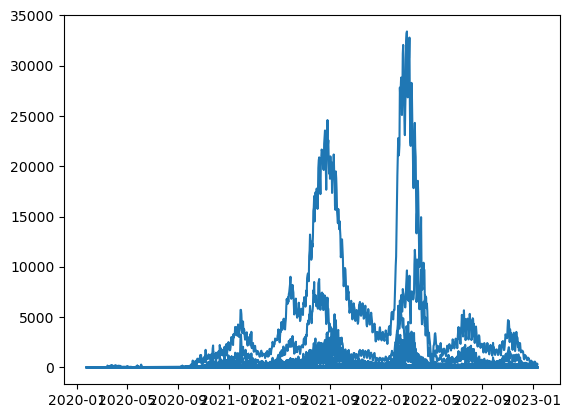

In [12]:
# after our datetime has been set as index, we can plot it.

import matplotlib.pyplot as plt

plt.plot(df1['cases_new'])